Лабораторная работа No.1, часть 1, датасет 1

Иванов Данила, 307 гр.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the dataset
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [5]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### To fill these Nan values the data distribution needs to be understood

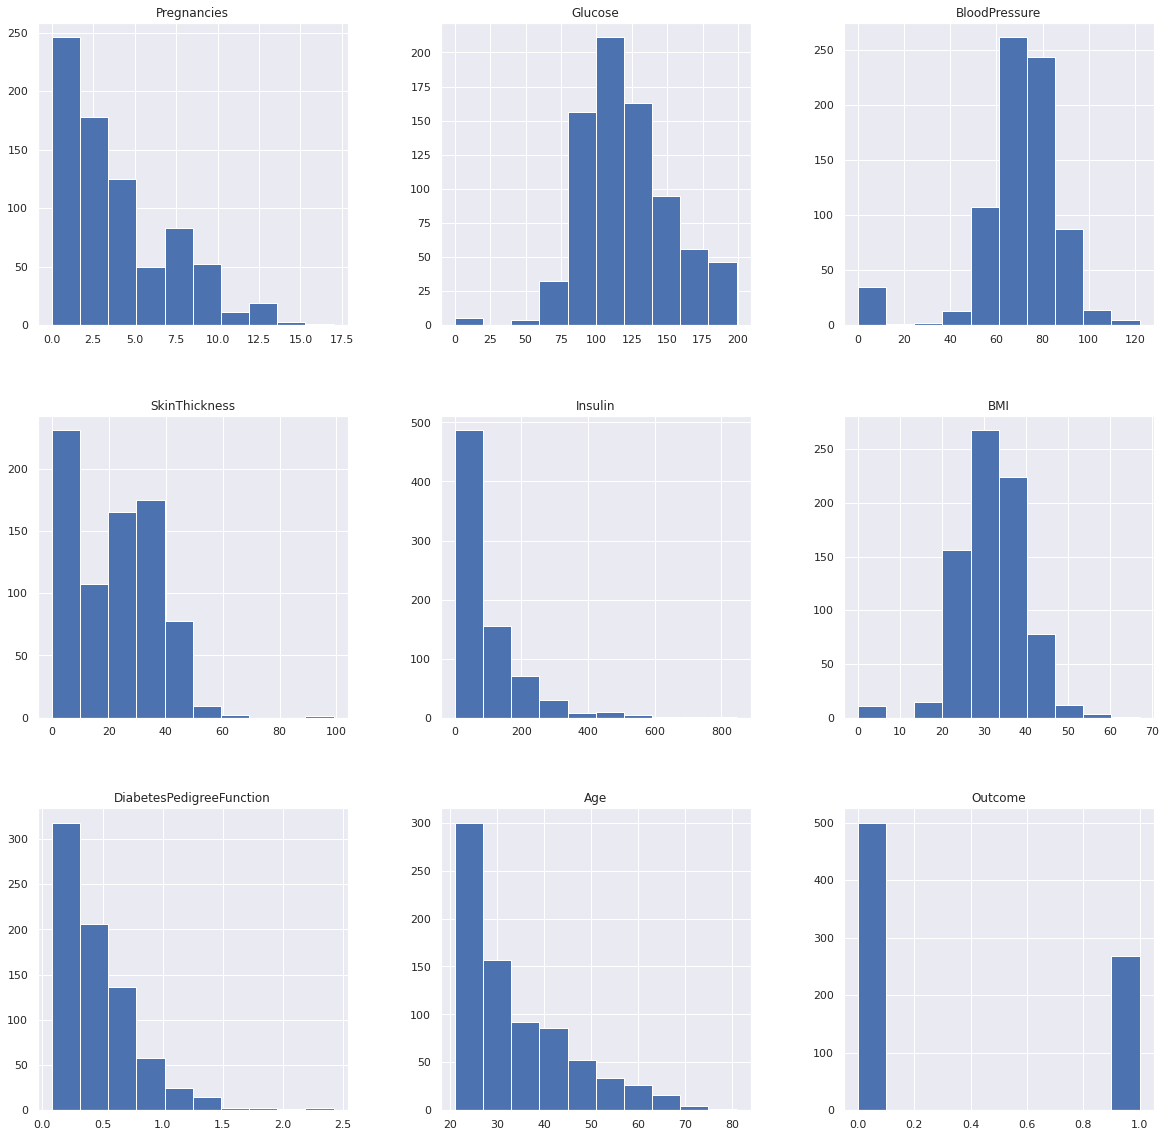

In [6]:
data.hist(figsize = (20,20))
plt.show()

### Aiming to impute nan values for the columns in accordance with their distribution

In [7]:
data_copy['Glucose'] = data_copy['Glucose'].fillna(data_copy['Glucose'].mean())
data_copy['BloodPressure'] = data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean())
data_copy['SkinThickness'] = data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median())
data_copy['Insulin'] = data_copy['Insulin'].fillna(data_copy['Insulin'].median())
data_copy['BMI'] = data_copy['BMI'].fillna(data_copy['BMI'].median())

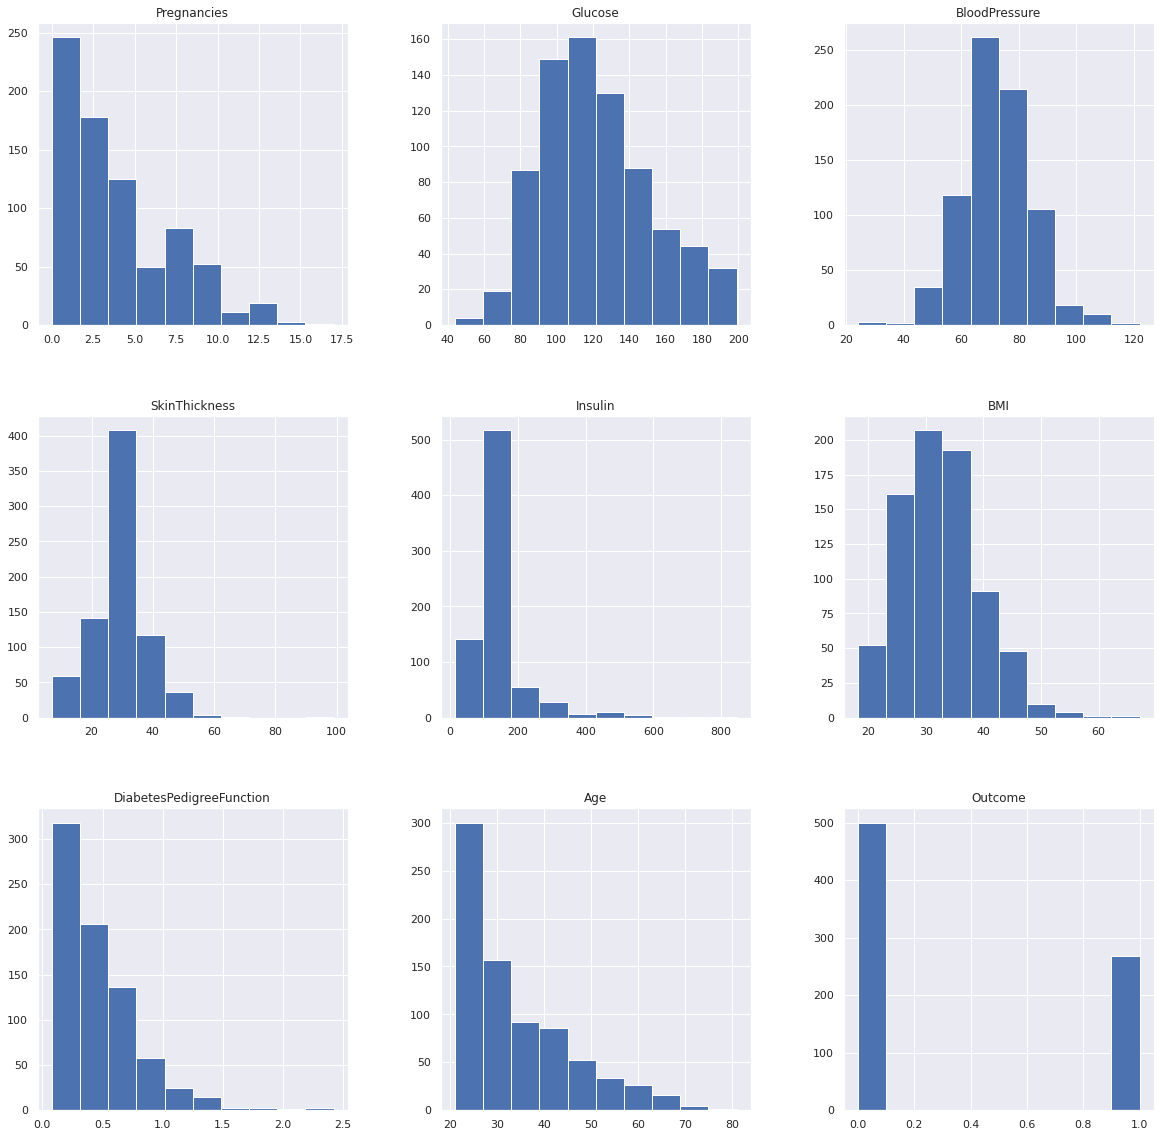

In [8]:
#Plotting after Nan removal 
data_copy.hist(figsize = (20,20))
plt.show()

In [9]:
## observing the shape of the data
data.shape

(768, 9)

#### Scatter matrix of uncleaned data

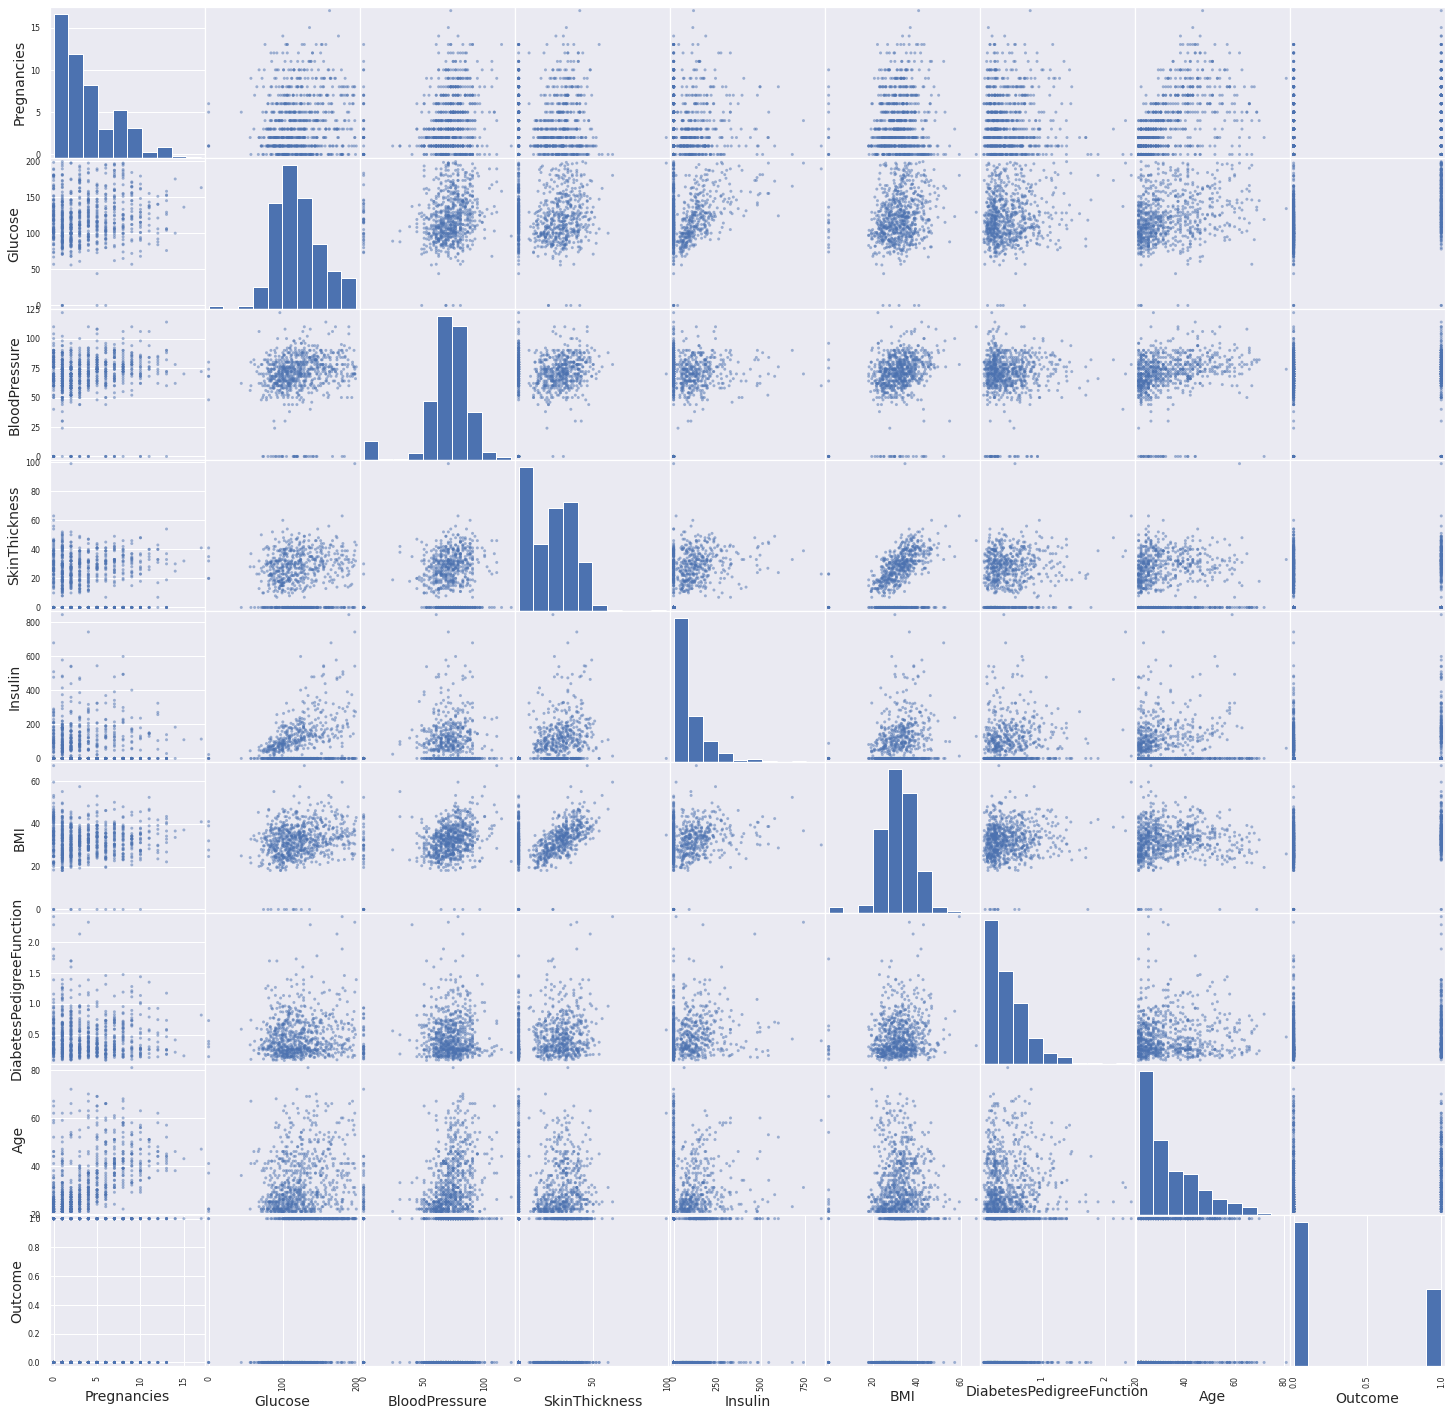

In [10]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(data,figsize=(25, 25))
for ax in p.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 14)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14)
plt.show()



```
# This is formatted as code
```

#### Pair plot for clean data

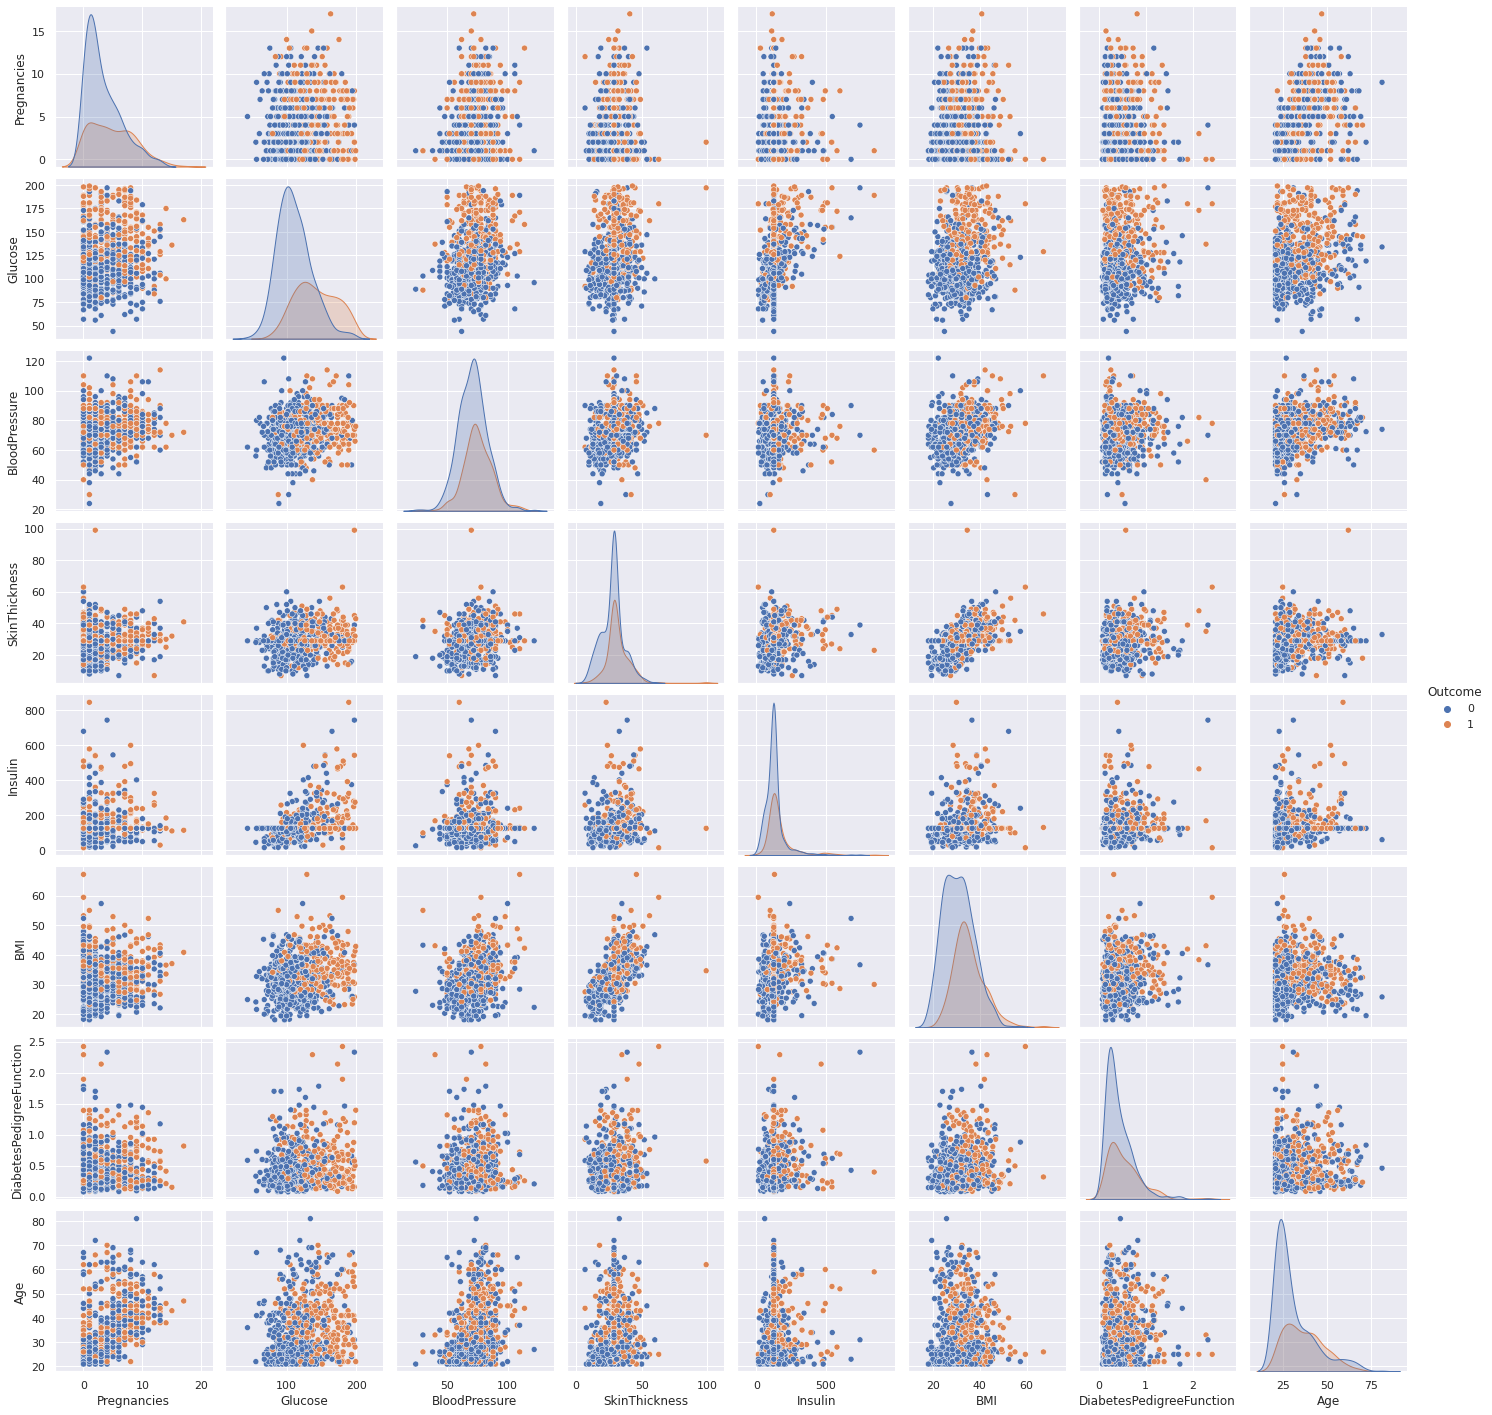

In [11]:
sns.pairplot(data_copy, hue='Outcome')
plt.show()

#### Heatmap for unclean data

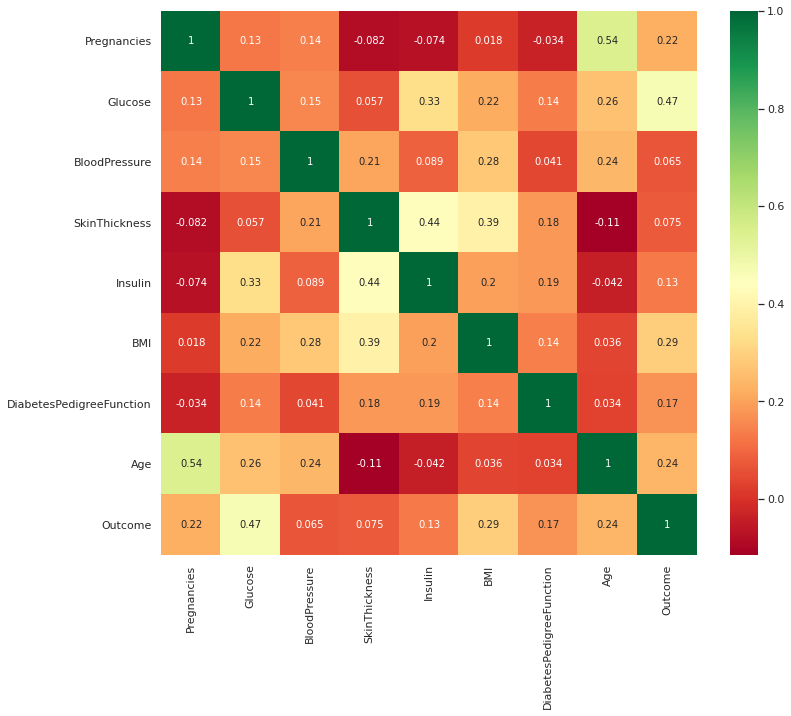

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 
plt.show()

#### Heatmap for clean data

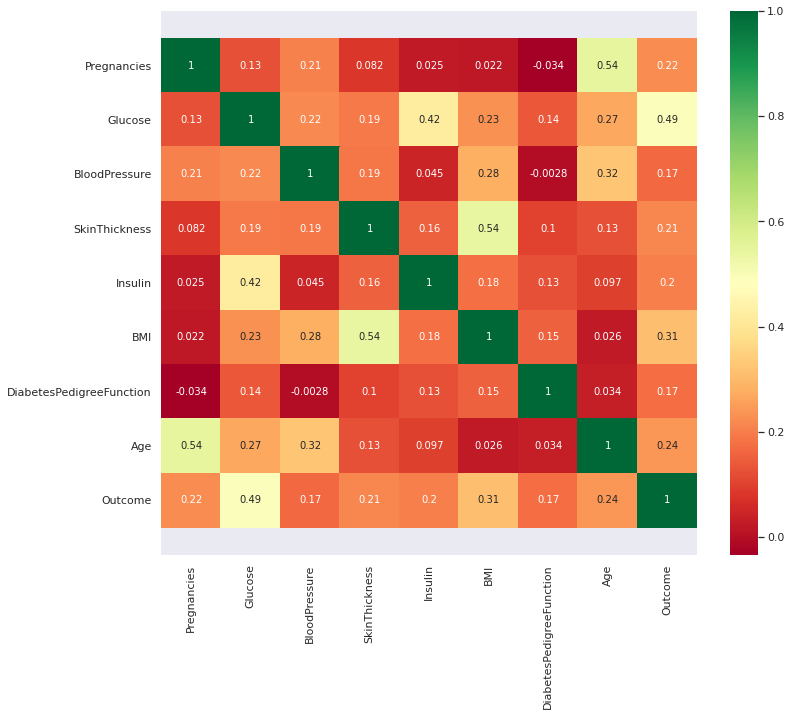

In [13]:
plt.figure(figsize=(12, 10))  
sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

После нашего преобразования данные стали более информативными. Такой вывод можно сделать из того, что корреляции признаков с таргетом достаточно сильно поднялись

In [14]:
from sklearn.preprocessing import StandardScaler
X =  pd.DataFrame(StandardScaler().fit_transform(data_copy.drop(["Outcome"],axis = 1)),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data_copy.Outcome

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


Такое преобразование необходимо для линейных моделей

## Modelling

In [16]:
from sklearn.ensemble import RandomForestClassifier as SklearnRFC
from sklearn.tree import DecisionTreeClassifier as SklearnDTC
from sklearn.neighbors import KNeighborsClassifier as SklearnKNN
from sklearn.linear_model import LogisticRegression as SklearnLR

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from models import *
np.random.seed(17)

In [17]:
def cv_score(clf, X, y, k_folds=5, average='macro'):
    kf = StratifiedKFold(n_splits=k_folds, random_state=123, shuffle=True)
    scores = np.zeros(k_folds)    
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        # numpy required in case of algos realisation
        X_train, y_train = X.loc[train_index].to_numpy(), y.loc[train_index].to_numpy()
        X_val, y_val = X.loc[val_index].to_numpy(), y.loc[val_index].to_numpy()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        scores[i] = f1_score(y_val, y_pred, average=average)
    return scores

###  Logreg

In [27]:
%%time
lr = LogisticRegression()
scores = cv_score(lr, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.726 +/- 0.041
CPU times: user 100 ms, sys: 1.02 ms, total: 101 ms
Wall time: 104 ms


In [28]:
%%time
s_lr = SklearnLR()
scores = cv_score(s_lr, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.724 +/- 0.053
CPU times: user 38.9 ms, sys: 979 µs, total: 39.9 ms
Wall time: 41.5 ms


### K_nearest_neighbours

In [29]:
%%time
knn = KNN(n_neighbors=5)
scores = cv_score(knn, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.711 +/- 0.052
CPU times: user 96.4 ms, sys: 76 ms, total: 172 ms
Wall time: 99 ms


In [30]:
%%time
s_knn = SklearnKNN(n_neighbors=5)
scores = cv_score(s_knn, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.711 +/- 0.052
CPU times: user 53.6 ms, sys: 1.97 ms, total: 55.6 ms
Wall time: 56.9 ms


### DTC

In [31]:
%%time
dtc = DecisionTreeClassifier(max_depth=5)
scores = cv_score(dtc, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.723 +/- 0.085
CPU times: user 760 ms, sys: 0 ns, total: 760 ms
Wall time: 771 ms


In [32]:
%%time
s_dtc = SklearnDTC(max_depth=5)
scores = cv_score(s_dtc, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.715 +/- 0.069
CPU times: user 31.3 ms, sys: 9 µs, total: 31.3 ms
Wall time: 31.9 ms


### RF

In [33]:
%%time
rf = RandomForestClassifier()
scores = cv_score(rf, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.572 +/- 0.093
CPU times: user 19.3 s, sys: 4.6 ms, total: 19.3 s
Wall time: 19.3 s


In [34]:
%%time
s_rf = SklearnRFC()
scores = cv_score(s_rf, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.742 +/- 0.064
CPU times: user 972 ms, sys: 4.97 ms, total: 977 ms
Wall time: 979 ms
